# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


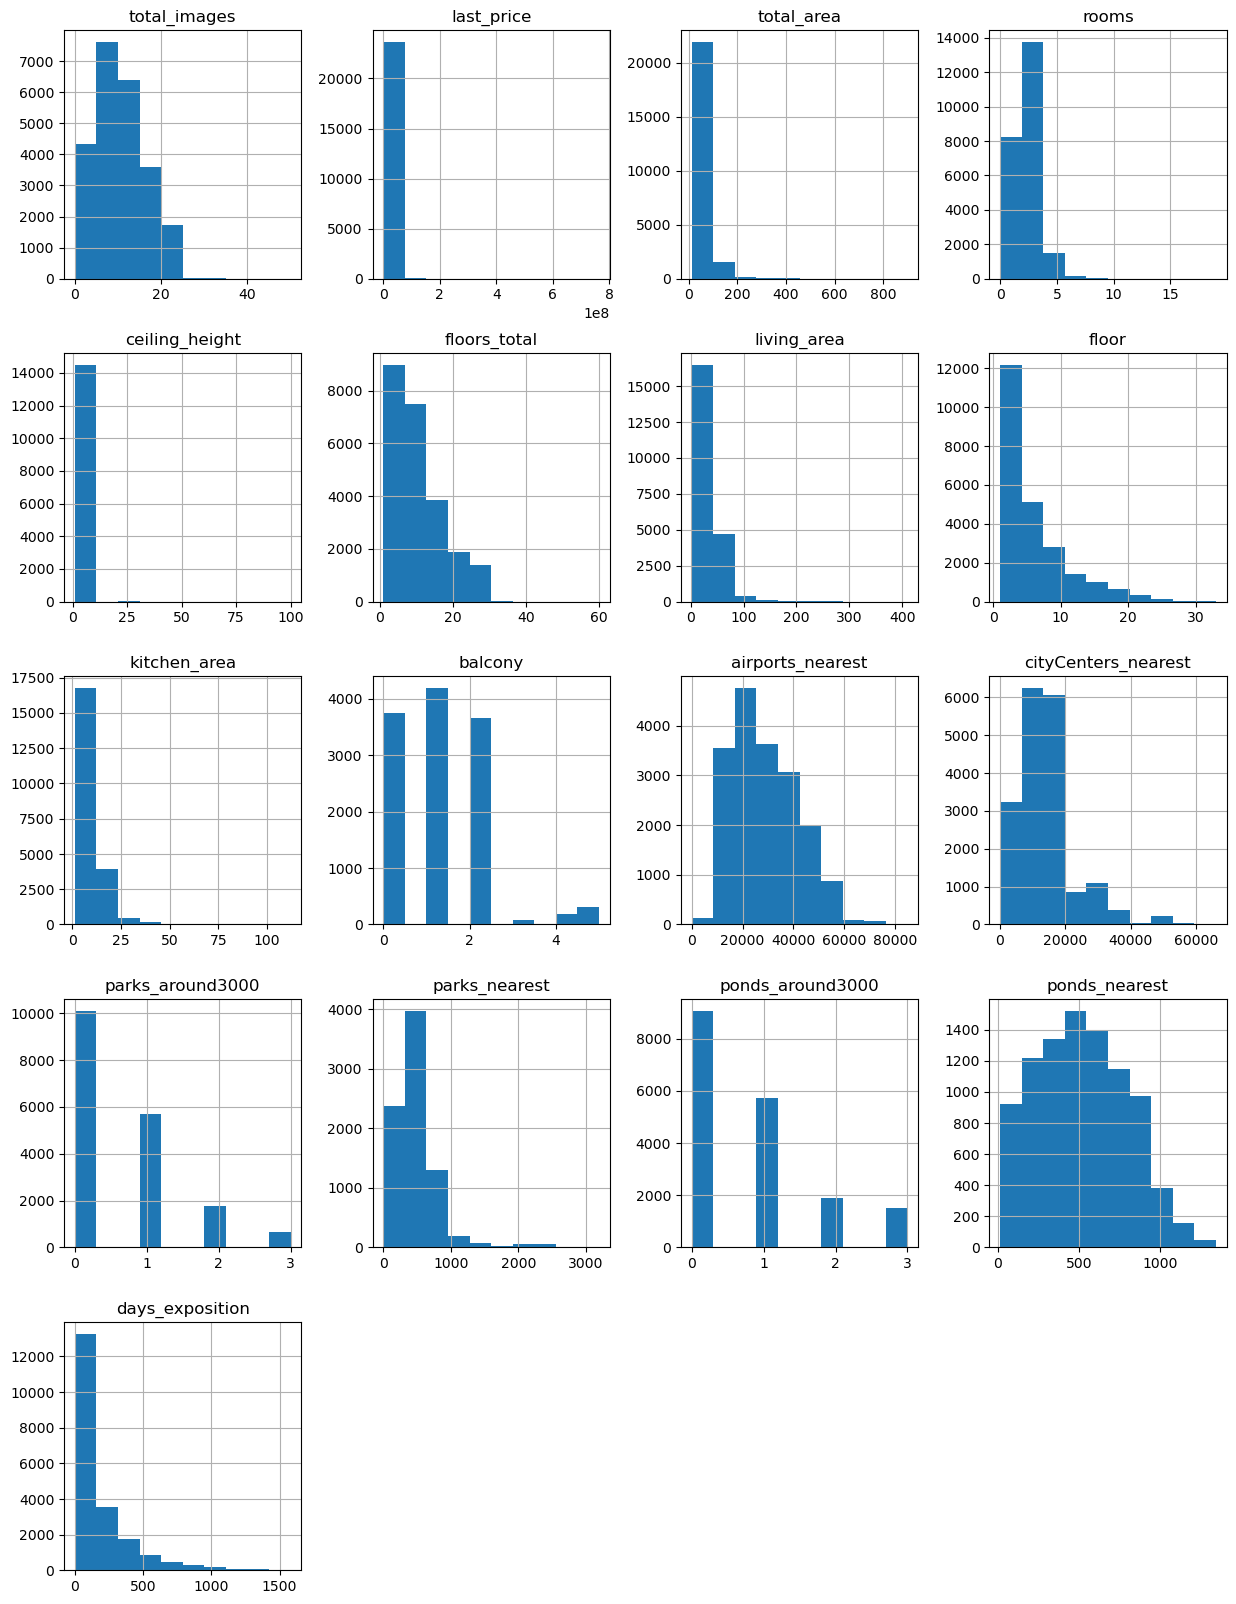

In [2]:
try:
    re_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except: 
    re_data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
re_data.info()
re_data.hist(figsize=(15, 20));
re_data.head(10)

Данные загрузились корректно. Заметно мнго пропусков в автозаполняемых столбцах.

## Выполните предобработку данных

In [3]:
re_data.loc[re_data['is_apartment'].isna(), 'is_apartment'] = False
re_data.loc[re_data['balcony'].isna(), 'balcony'] = 0
re_data['first_day_exposition'] = pd.to_datetime(re_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
re_data = re_data.astype(
    {'last_price': int,
    'is_apartment': bool,
    'balcony': int,
    'floors_total': int},
# 'floors_total': Int64
    errors = 'ignore'
)

In [4]:
re_data.locality_name = ( 
    re_data.locality_name
    .str.replace('ё', 'е')
    .replace(
        ['деревня', 'городской поселок', 'поселок городского типа', 'поселок станции', 'коттеджный поселок', 'поселок', 'село'], 
        '', regex=True
        )
    .str.strip()
) 

Клиенты могли не предоставить данные. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной. Относительно пропусков, допущенных автоматическим заполенинием, вероятно мог произойти сбой в геолокации или же некоторых объектов могло попросту не находиться в определённом радиусе.

Во всех столбцах, где значение подразумевают целое число, я изменил на int, для того чтобы датафрейм занимал меньше места.
Столбец с апартаментами для удобства анализа преобразовал в булев тип. Предполагая, что человек заполнявший сведение об апартаменте, не указывал являются ли они таковыми, отсюда и пропущенные значение, которые я заменил на False.

## Добавьте в таблицу новые столбцы

In [5]:
def floor_type(row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    return 'другой'

In [6]:
re_data['price_sm'] = round(re_data['last_price'] / re_data['total_area'], 2)
re_data['weekday_pub'] = re_data['first_day_exposition'].dt.weekday
re_data['month_pub'] = pd.DatetimeIndex(re_data.first_day_exposition).month
re_data['year_pub'] = pd.DatetimeIndex(re_data.first_day_exposition).year
re_data['floor_type'] = re_data.apply(floor_type, axis=1)
re_data['km_centre'] = round(re_data['cityCenters_nearest'] / 1000)
re_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sm,weekday_pub,month_pub,year_pub,floor_type,km_centre
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


## Проведите исследовательский анализ данных

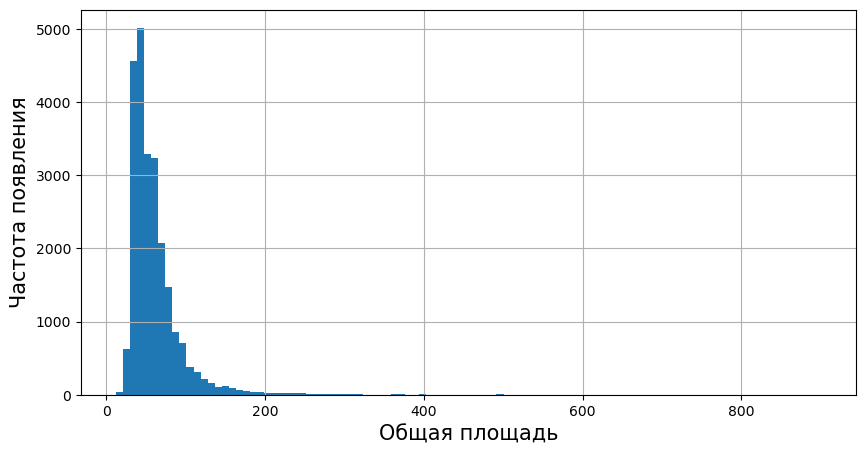

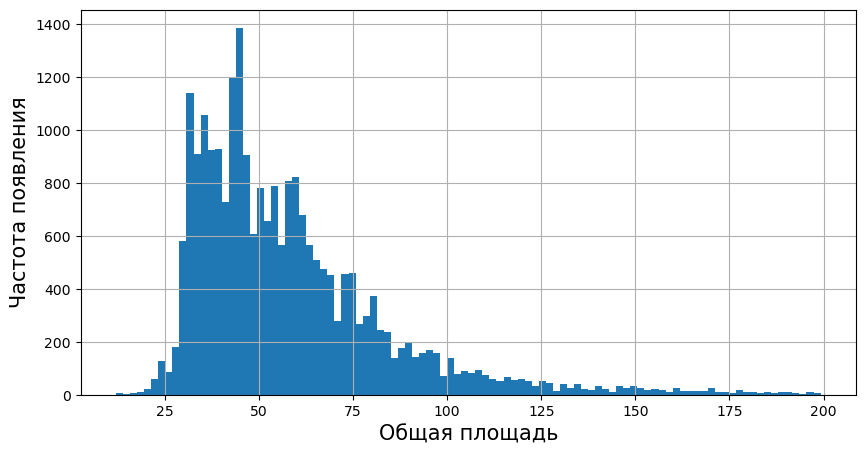

In [7]:
re_data['total_area'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Общая площадь', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['total_area'] < 200, 'total_area']
    .hist(bins=100, figsize=(10, 5))
)
plt.xlabel('Общая площадь', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Большего всего выставленных квартир с общей площадью около 50м²

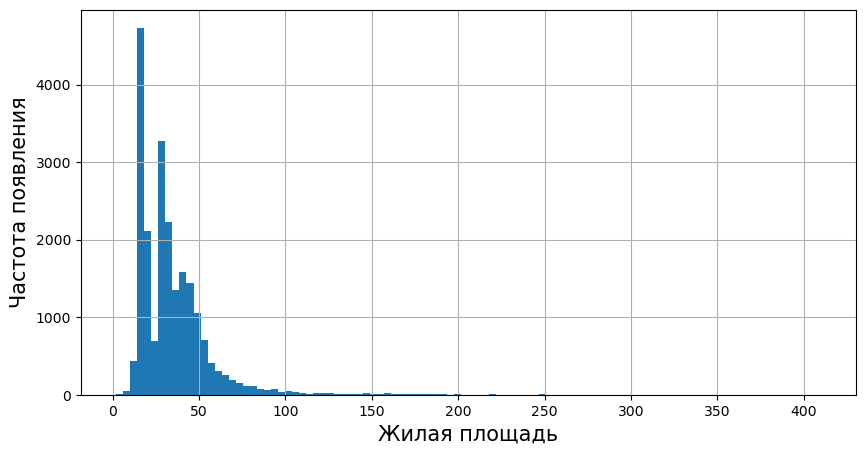

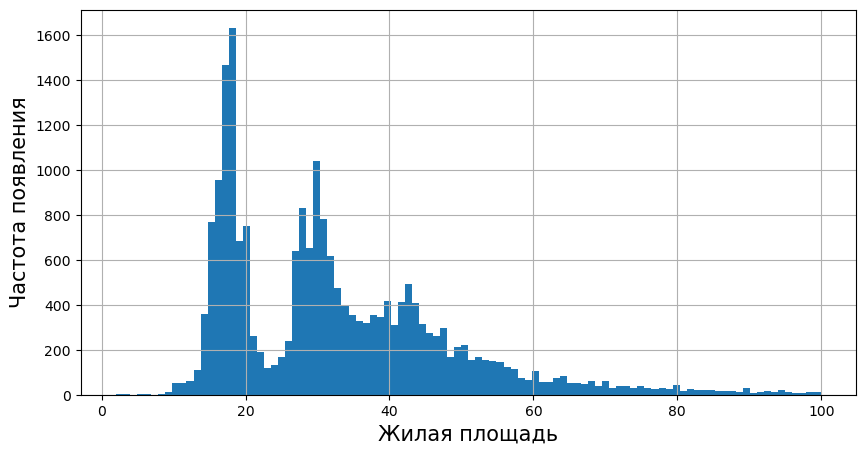

In [8]:
re_data['living_area'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Жилая площадь', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['living_area'] < 100, 'living_area']
    .hist(bins=100, figsize=(10, 5))
)
plt.xlabel('Жилая площадь', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Большего всего выставленных квартир с жилой площадью около 35м²

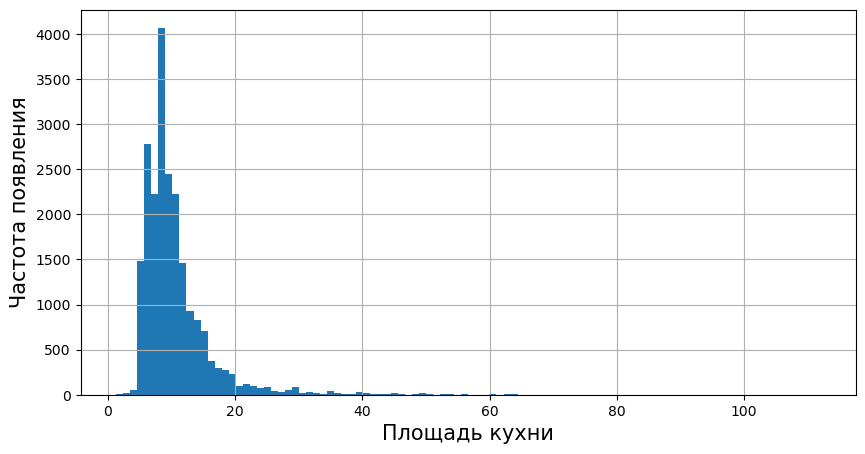

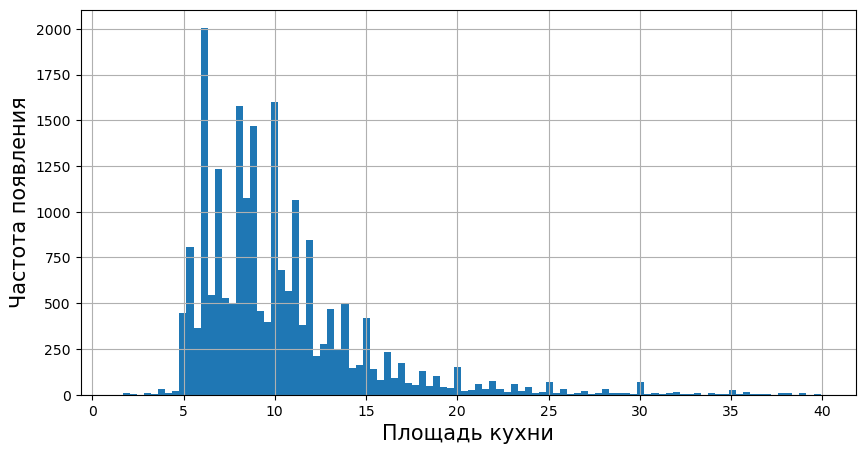

In [9]:
re_data['kitchen_area'].hist(bins=100, figsize=(10, 5))
plt.xlabel('Площадь кухни', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['kitchen_area'] < 40, 'kitchen_area']
    .hist(bins=100, figsize=(10, 5))
)
plt.xlabel('Площадь кухни', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Большего всего выставленных квартир с площадью кухни около 30м²

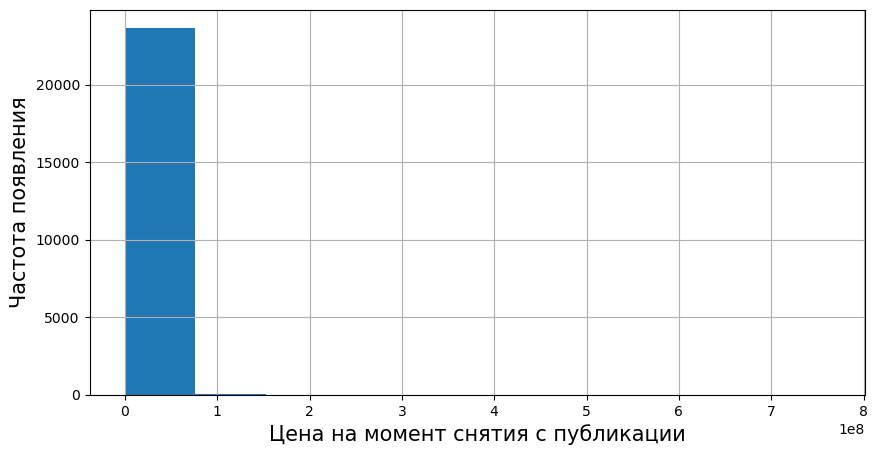

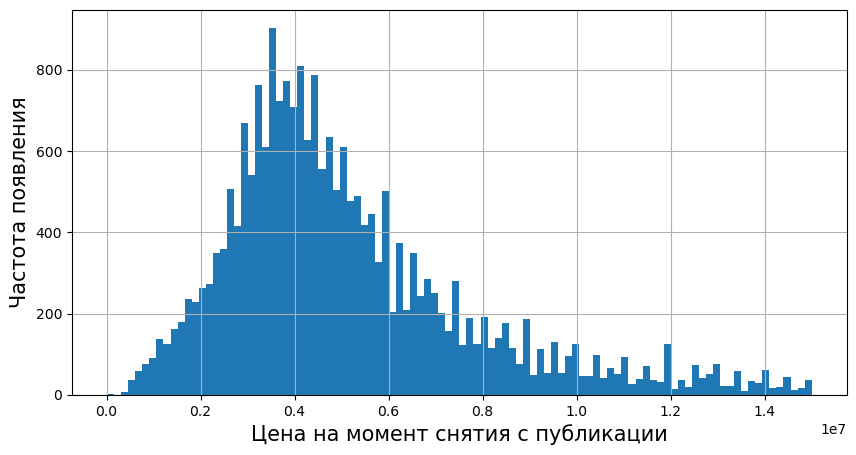

In [10]:
re_data['last_price'].hist(bins=10, figsize=(10, 5))
plt.xlabel('Цена на момент снятия с публикации', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['last_price'] < 15000000, 'last_price']
    .hist(bins=100, figsize=(10, 5))
)
plt.xlabel('Цена на момент снятия с публикации', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Большеше всего квартир было продано по цеене примерно 5 млн.

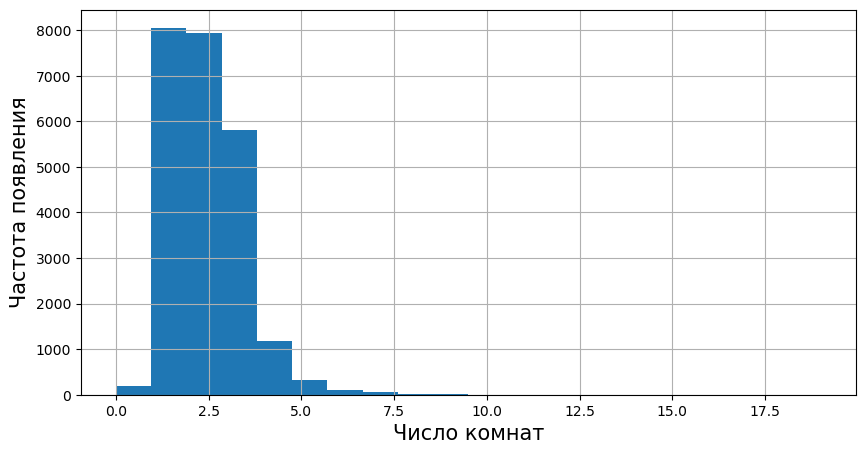

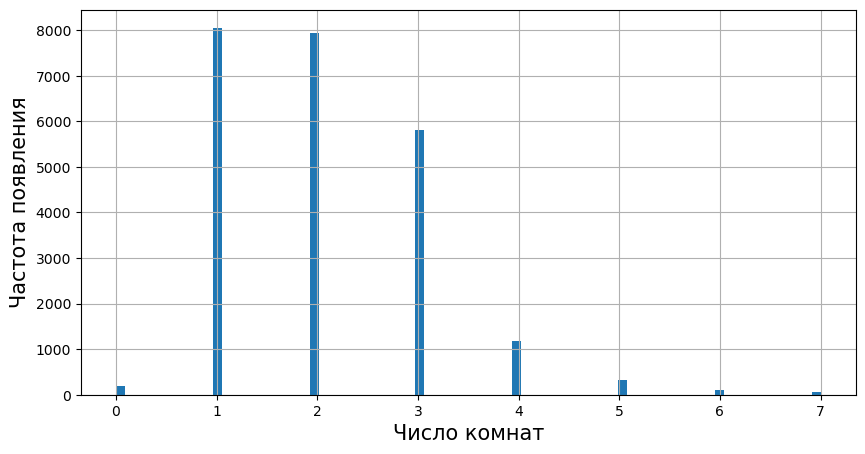

In [11]:
re_data['rooms'].hist(bins=20, figsize=(10, 5))
plt.xlabel('Число комнат', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['rooms'] < 8, 'rooms']
    .hist(bins=80, figsize=(10, 5))
)
plt.xlabel('Число комнат', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Большеше всего квартир было с 2 комнатами.

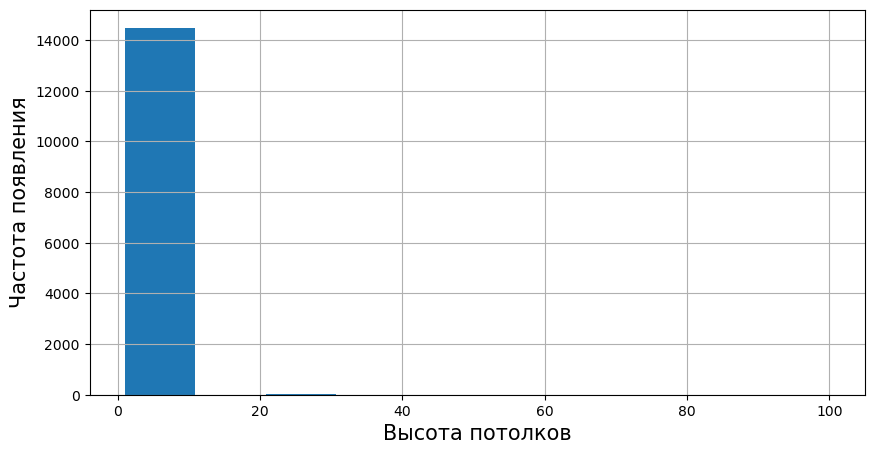

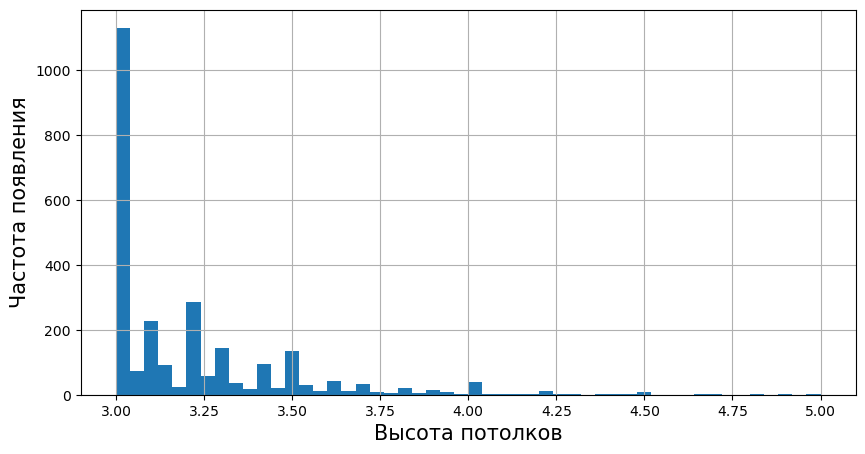

In [12]:
re_data['ceiling_height'].hist(figsize=(10, 5))
plt.xlabel('Высота потолков', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['ceiling_height'] < 6, 'ceiling_height']
    .hist(bins=50, figsize=(10, 5), range=(3,5))
)
plt.xlabel('Высота потолков', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Больше всего квартир было с высотой полков от 2 до 3 метров.

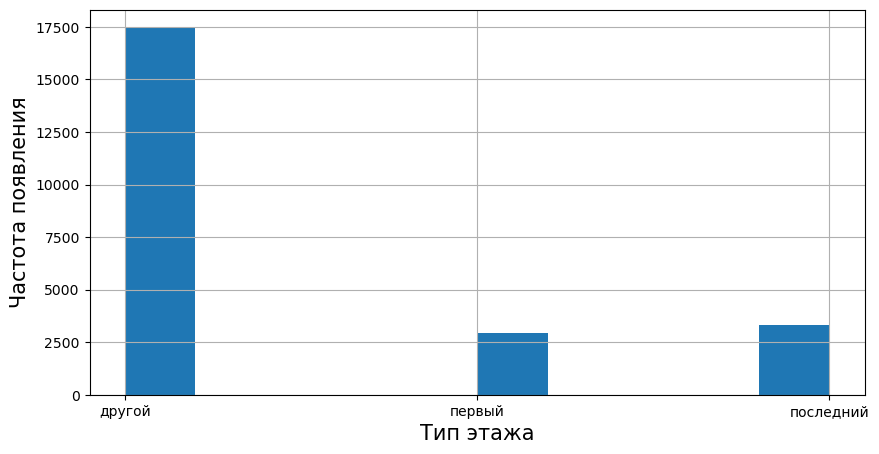

In [13]:
re_data['floor_type'].hist(figsize=(10, 5))
plt.xlabel('Тип этажа', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Больше всего квартир располагалось между первым и последним этажами.

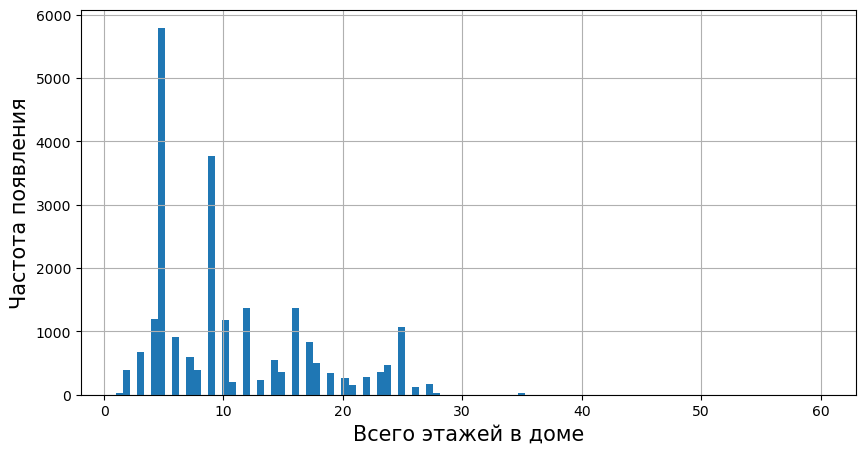

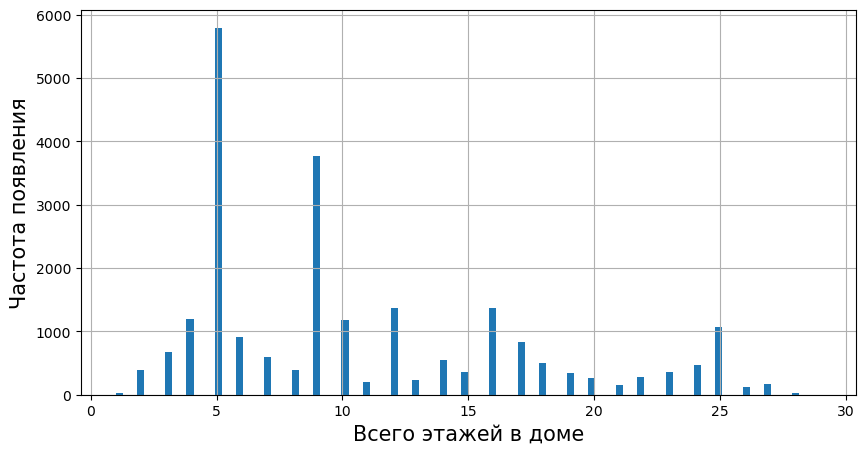

In [14]:
re_data['floors_total'].hist(bins=100,figsize=(10, 5))
plt.xlabel('Всего этажей в доме', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);
plt.show()
(re_data
    .loc[re_data['floors_total'] < 30, 'floors_total']
    .hist(bins=100, figsize=(10, 5))
)
plt.xlabel('Всего этажей в доме', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Больше всего домов, в которых продавались квартиры, имели 5 этажей

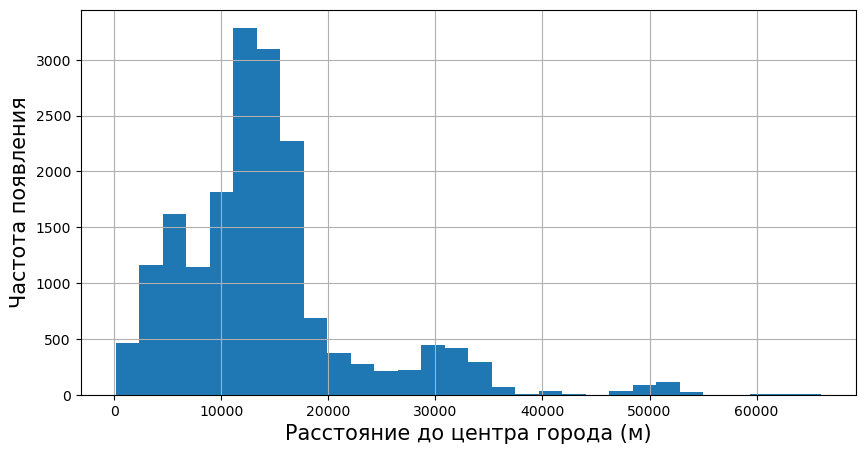

In [15]:
re_data['cityCenters_nearest'].hist(bins=30, figsize=(10, 5))
plt.xlabel('Расстояние до центра города (м)', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Больше всего квартир находилось от центра в 10 - 20км.

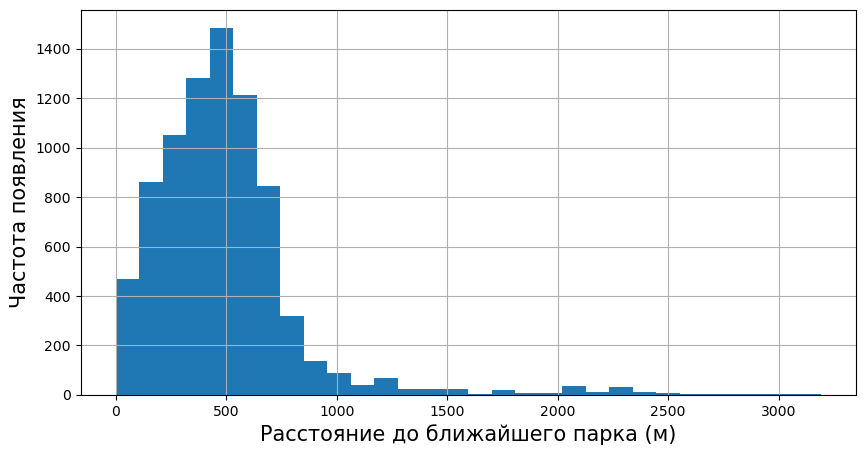

In [16]:
re_data['parks_nearest'].hist(bins=30, figsize=(10, 5))
plt.xlabel('Расстояние до ближайшего парка (м)', fontsize = 15);
plt.ylabel('Частота появления', fontsize = 15);

Больше всего квартир раполагалось в 500 метрах от парка.

### check nan

In [17]:
# check
re_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [18]:
re_data.loc[re_data['ceiling_height'] > 10, 'ceiling_height'] /= 10
re_data = (re_data
           .query('(20 < total_area < 400) and (550000 < last_price < 15000000) \
                  and (rooms < 8)'))
re_data = (re_data
           .drop(re_data[re_data['living_area'] > 130].index)
           .drop(re_data[re_data['living_area'] < 9].index)
          )
re_data = (re_data
           .drop(re_data[re_data['kitchen_area'] > 40].index)
           .drop(re_data[re_data['kitchen_area'] < 3.5].index)
          )
re_data = (re_data
           .drop(re_data[re_data['ceiling_height'] > 6].index)
           .drop(re_data[re_data['ceiling_height'] < 2].index)
          )
re_data = (re_data
           .drop(re_data[re_data['days_exposition'] > 1400].index)
           .drop(re_data[re_data['days_exposition'] < 3].index)
          )
re_data = re_data.drop(re_data[re_data['floors_total'] > 35].index)

Обнаружил аномально большие и маленькие значения в столбцах: общей, жилой площади и кухни, цены на момент снятия с публицации, числа комнат и числа этажей. Исключил эти значения из датафрейма. Исправил ошибочные значения в столбце высоты полков.

count    19503.000000
mean       175.353843
std        211.833382
min          3.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1396.000000
Name: days_exposition, dtype: float64

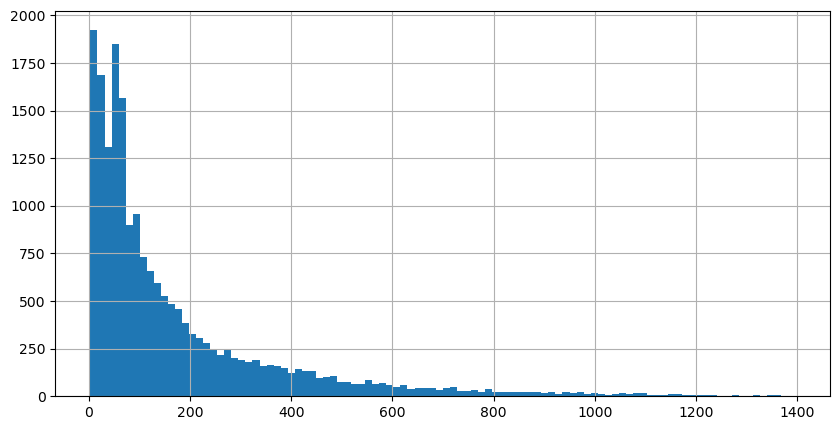

In [19]:
re_data['days_exposition'].hist(bins=100, figsize=(10, 5))
re_data['days_exposition'].describe()

Обычно продажа объекта составляет около 90. До 44 дней составляет быстрая продажа квартиры, а очень долгая от 224.

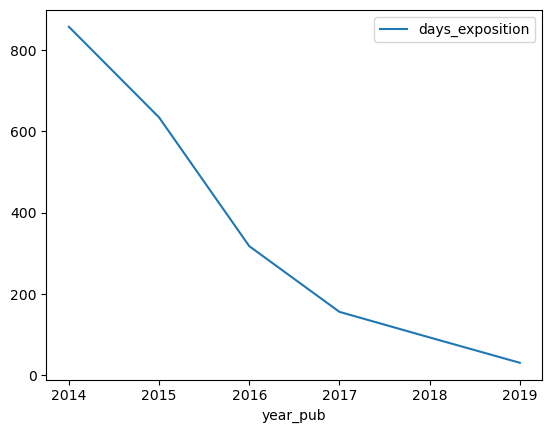

In [20]:
(re_data
 .pivot_table(index='year_pub', values='days_exposition')
 .reset_index()
 .plot(x='year_pub', y='days_exposition')
);

0.7430153827123991

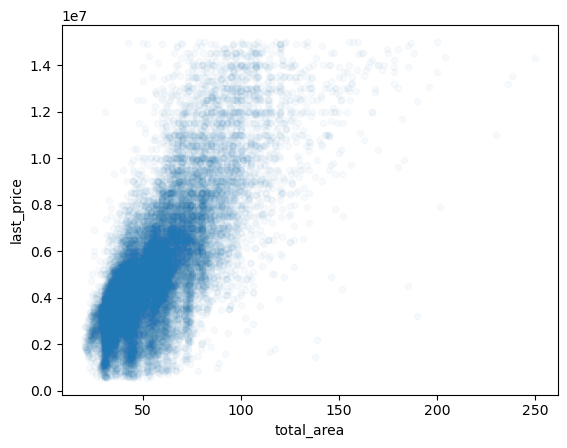

In [21]:
re_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)
re_data.last_price.corr(re_data.total_area)

0.6342606918846764

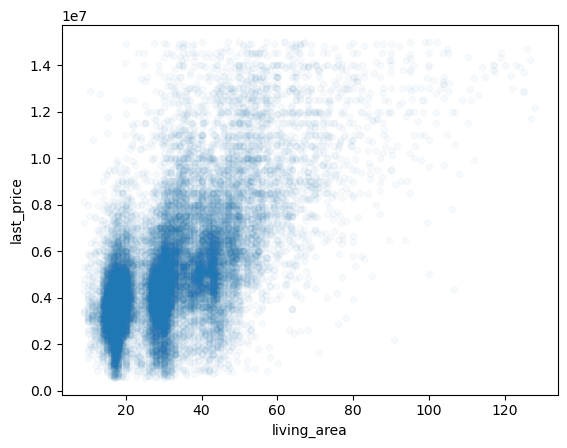

In [22]:
re_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)
re_data.last_price.corr(re_data.living_area)

0.5408526580967091

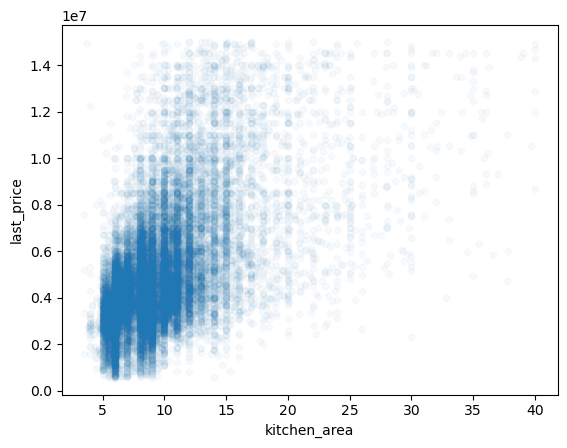

In [23]:
re_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
re_data.last_price.corr(re_data.kitchen_area)

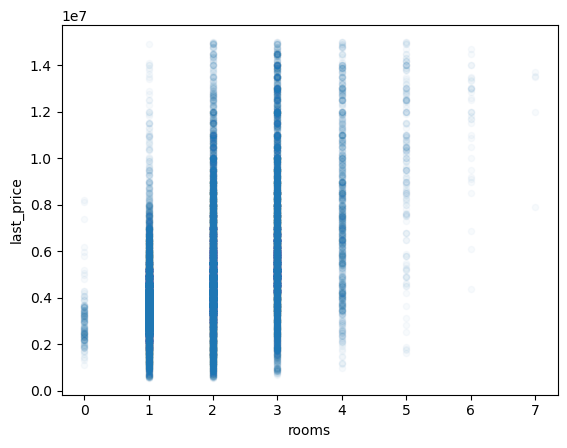

In [24]:
re_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03);

Text(0, 0.5, '')

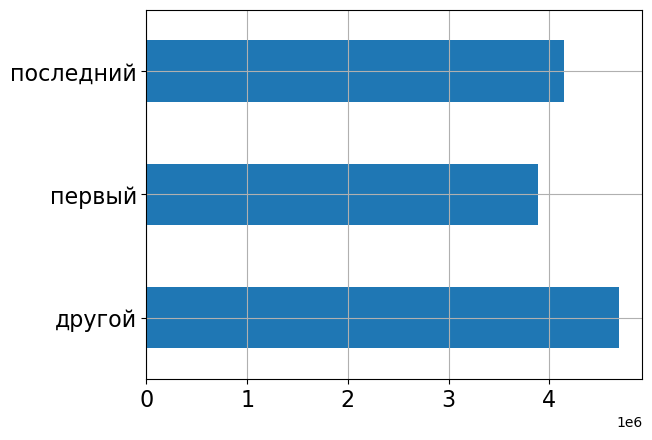

In [25]:
(re_data
 .pivot_table(index='floor_type', values='last_price', aggfunc='median')
 .plot(kind = 'barh', legend = False, fontsize = 16, grid = True)
);
plt.ylabel('')

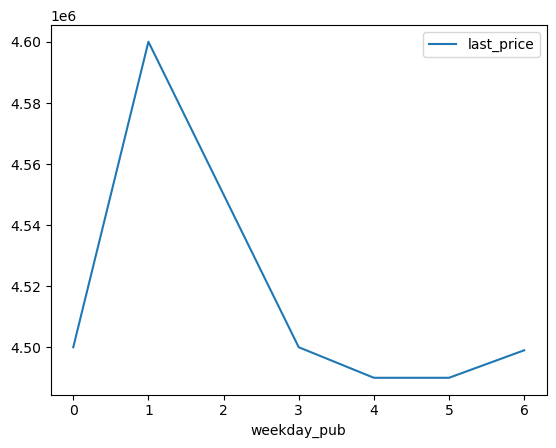

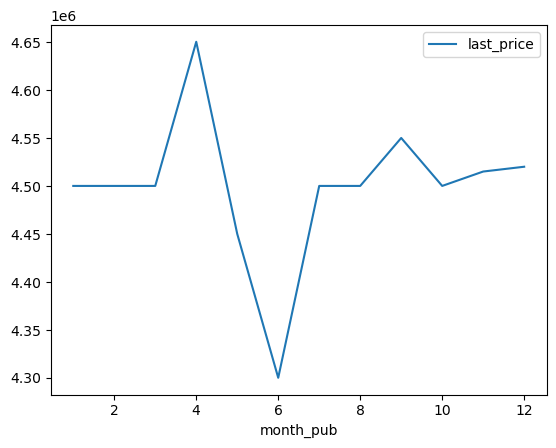

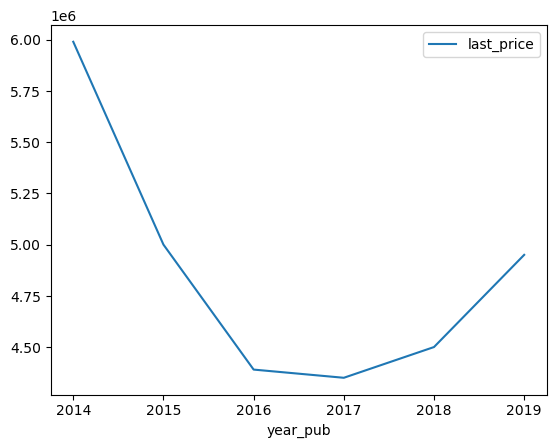

In [26]:
(re_data
 .pivot_table(index='weekday_pub', values='last_price', aggfunc='median')
 .reset_index()
 .plot(x='weekday_pub', y='last_price')
);
(re_data
 .pivot_table(index='month_pub', values='last_price', aggfunc='median')
 .reset_index()
 .plot(x='month_pub', y='last_price')
);
(re_data
 .pivot_table(index='year_pub', values='last_price', aggfunc='median')
 .reset_index()
 .plot(x='year_pub', y='last_price')
);

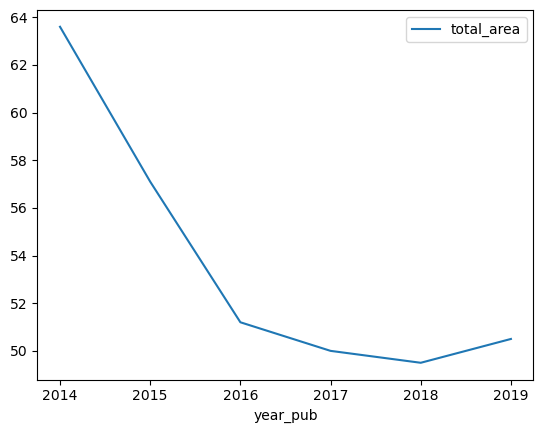

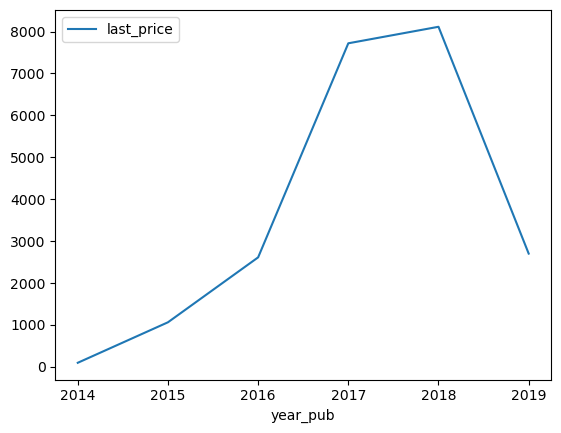

In [27]:
(re_data
 .pivot_table(index='year_pub', values='total_area', aggfunc='median')
 .reset_index()
 .plot(x='year_pub', y='total_area')
);
(re_data
 .pivot_table(index='year_pub', values='last_price', aggfunc='count')
 .reset_index()
 .plot(x='year_pub', y='last_price')
);

C 2014 по 2016 год виден обвал цен. С 2016 по 2017 также происходит понижение, а вот с 2017 и далее цены начинаю возрастать. На резкий обвал повлияло уменьшение общей площади квартир, а количество объявлений возрастало. В ситуции возрастания влияющими факторами являлись увеличени площади и уменьшение объявлений.

In [28]:
average_cost = re_data.pivot_table(index='locality_name', values='price_sm', aggfunc=['count', 'mean'])
average_cost.columns = ['Число объявлений', 'Средняя цена']
average_cost['Средняя цена'] = round(average_cost['Средняя цена']).astype(int)
average_cost = average_cost.sort_values('Число объявлений', ascending=False).head(10)
average_cost

,Число объявлений,Средняя цена
locality_name,,
Санкт-Петербург,14427,107014
Мурино,585,85991
Кудрово,471,95336
Шушары,438,78682
Всеволожск,395,67251
Пушкин,345,100995
Колпино,337,75333
Парголово,326,90103
Гатчина,307,68746


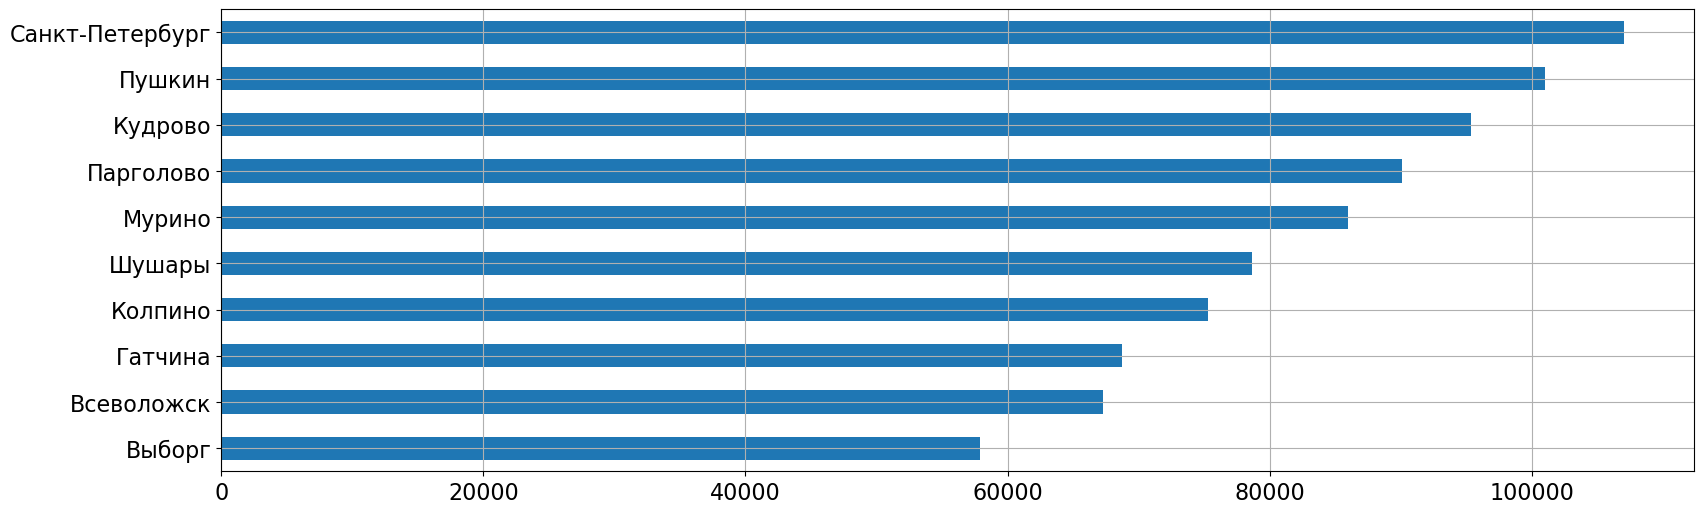

In [29]:
(average_cost
 .drop('Число объявлений', axis=1)
 .sort_values(by = 'Средняя цена', ascending = True)
 .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16, grid = True)
);
plt.ylabel('');

Самый высокая цена за один квадратный метр в Санкт-Петербурге, а дешёвая в Выборге.

In [30]:
km_price = (re_data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='km_centre' , values='last_price', aggfunc='mean')
    .sort_values('km_centre')
    .reset_index()
)
km_price.columns = ['Расстояние до центра', 'Средняя стоимость']
km_price['Средняя стоимость'] = round(km_price['Средняя стоимость'])
km_price

,Расстояние до центра,Средняя стоимость
0,0.0,9606154.0
1,1.0,9267556.0
2,2.0,9025518.0
3,3.0,8298147.0
4,4.0,8520083.0
5,5.0,8493568.0
6,6.0,7825646.0
7,7.0,7216781.0
8,8.0,7143479.0
9,9.0,6052266.0


Чем дальше от центра города, тем средняя цена квартиры уменьшается.

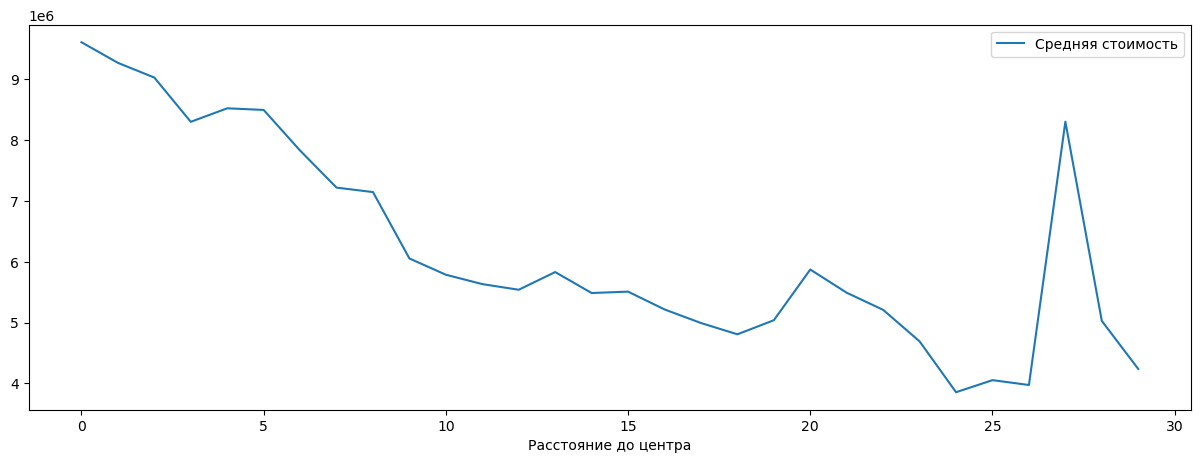

In [31]:
km_price.plot(x='Расстояние до центра', y='Средняя стоимость', figsize = (15,5));

In [32]:
re_data[(re_data['km_centre'] == 27) & (re_data['locality_name'] == 'Санкт-Петербург')].last_price

748     14350000
5961     2250000
Name: last_price, dtype: int32

Выброс связан с проданной квартирой на этом расстоянии за более чем 14млн., при том что всего 2 объекта находилось на этом расстоянии.

In [33]:
share_floor_type = (re_data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index=['km_centre', 'floor_type'] , values='floor', aggfunc=['count', 'sum'])
    .sort_values('km_centre')
    .reset_index()
)
share_floor_type.columns = ['Расстояние до центра', 'Тип этажа', 'Число этажей', 'Всего этажей']
share_floor_type['Доля'] = round((share_floor_type['Число этажей'] / share_floor_type['Всего этажей'])*100)
share_floor_type

,Расстояние до центра,Тип этажа,Число этажей,Всего этажей,Доля
0,0.0,другой,9,28,32.0
1,0.0,первый,2,2,100.0
2,0.0,последний,2,8,25.0
3,1.0,другой,75,213,35.0
4,1.0,первый,15,15,100.0
...,...,...,...,...,...
84,28.0,другой,4,25,16.0
85,28.0,последний,1,5,20.0
86,29.0,первый,4,4,100.0
87,29.0,другой,1,2,50.0


In [34]:
share_floor_type[share_floor_type['Расстояние до центра'] == 27]

,Расстояние до центра,Тип этажа,Число этажей,Всего этажей,Доля
81,27.0,другой,1,3,33.0
82,27.0,последний,1,2,50.0


## Напишите общий вывод

Стоимость квартиры зависит от общей площади, но от жилой и кухни в меньшей степени. По мере увеличение числа комнат, также растет стоимость объекта. Больше всего объектов покупали во вторник. В апреле совершались сдлелки чаще всего, а в июне ровно наоборот. C 2014 по 2016 год виден обвал цен. С 2016 по 2017 также происходит понижение, а вот с 2017 и далее цены начинаю возрастать. На резкий обвал повлияло уменьшение общей площади квартир, а количество объявлений возрастало. В ситуции возрастания влияющими факторами являлись увеличени площади и уменьшение объявлений. В Санкт-Петербурге и Пушкине самая высокая цена, в Выборге самая низкая, за квадратный метр. На графике средней стоимости от расстояния до центра видны всплески, что по моему мнению обусловлено расположением района.